In [17]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt

In [18]:
start = dt.datetime(2021,1,1)
end = dt.datetime(2021,6,1)
data = web.DataReader("IBM",'yahoo', start, end).reset_index()

In [19]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-12-31,126.029999,123.989998,124.220001,125.879997,3574400.0,122.847458
1,2021-01-04,125.919998,123.040001,125.849998,123.940002,5179200.0,120.954201
2,2021-01-05,126.680000,124.610001,125.010002,126.139999,6114600.0,123.101204
3,2021-01-06,131.880005,126.720001,126.900002,129.289993,7956700.0,126.175316
4,2021-01-07,130.460007,128.259995,130.039993,128.990005,4507400.0,125.882545


In [20]:
close = data['Close']

In [21]:
delta = close.diff()

In [22]:
delta = delta[1:] 

up, down = delta.clip(lower=0), delta.clip(upper=0)


In [23]:
down

1     -1.939995
2      0.000000
3      0.000000
4     -0.299988
5     -0.460007
         ...   
99    -0.930008
100   -0.409988
101    0.000000
102   -0.080002
103    0.000000
Name: Close, Length: 103, dtype: float64

In [24]:
window_length = 14


In [25]:
roll_up2 = up.rolling(window_length).mean()
roll_down2 = down.abs().rolling(window_length).mean()

RS2 = roll_up2 / roll_down2
RSI2 = 100.0 - (100.0 / (1.0 + RS2))


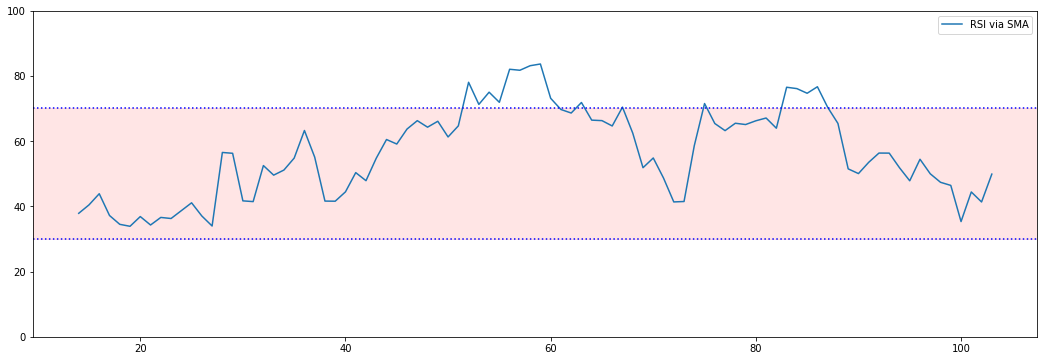

In [40]:
plt.figure(figsize=(18, 6))
RSI2.plot()
plt.ylim([0,100])
plt.axhline(y = 70, color = 'b', linestyle = ':', label = "blue line")
plt.axhline(y = 30, color = 'b', linestyle = ':', label = "blue line")
plt.axhspan(30, 70,color='red',alpha=0.1)

plt.legend([ 'RSI via SMA'])
plt.show()